# Language detection

In [27]:
import json
import numpy as np
import pandas as pd

In [28]:
df_large = pd.read_csv("data/sentences.csv")
df_large.head()

,id,lan_code,sentence
0,1,cmn,我們試試看！
1,2,cmn,我该去睡觉了。
2,3,cmn,你在干什麼啊？
3,4,cmn,這是什麼啊？
4,5,cmn,今天是６月１８号，也是Muiriel的生日！


In [29]:
df_large.shape

(10341812, 3)

In [30]:
with open("data/lan_to_language.json", "r") as json_file:
    lan_lang = json.load(json_file)

In [31]:
code_list = [code for code in lan_lang.keys()]

In [32]:
df = df_large[df_large['lan_code'].isin(code_list)]

In [33]:
df.head()

,id,lan_code,sentence
0,1,cmn,我們試試看！
1,2,cmn,我该去睡觉了。
2,3,cmn,你在干什麼啊？
3,4,cmn,這是什麼啊？
4,5,cmn,今天是６月１８号，也是Muiriel的生日！


In [34]:
df.shape

(7687833, 3)

<AxesSubplot:>

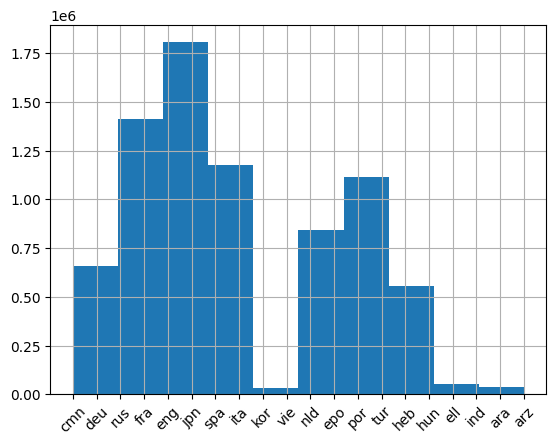

In [36]:
df["lan_code"].hist(xrot=45)

In [59]:
occurances = dict(df_large.groupby("lan_code")["id"].count())
occurances_sort = sorted(occurances.items(), key=lambda x: x[1], reverse=True)
occurances_sort

[('eng', 1586621),
 ('rus', 909951),
 ('ita', 805104),
 ('tur', 717897),
 ('epo', 685643),
 ('ber', 591222),
 ('deu', 584674),
 ('kab', 518328),
 ('fra', 501241),
 ('por', 398029),
 ('spa', 369841),
 ('hun', 357828),
 ('jpn', 220103),
 ('heb', 199203),
 ('ukr', 178269),
 ('nld', 159193),
 ('fin', 139089),
 ('pol', 116582),
 ('mkd', 77949),
 ('lit', 76149),
 ('cmn', 72439),
 ('mar', 69303),
 ('ces', 63880),
 ('dan', 54945),
 ('tok', 47203),
 ('swe', 47006),
 ('srp', 45199),
 ('lat', 41498),
 ('ara', 38650),
 ('ell', 34805),
 ('ron', 28172),
 ('ina', 27493),
 ('pes', 25662),
 ('bul', 24609),
 ('tlh', 22288),
 ('lfn', 21414),
 ('vie', 20897),
 ('nds', 17988),
 ('tgl', 17910),
 ('slk', 16882),
 ('jbo', 16205),
 ('ind', 15717),
 ('hin', 14573),
 ('nob', 14326),
 ('tat', 13766),
 ('bel', 12654),
 ('isl', 12460),
 ('ckb', 10650),
 ('ido', 9686),
 ('kmr', 9654),
 ('yid', 9603),
 ('kor', 8981),
 ('cat', 8072),
 ('uig', 7813),
 ('ile', 7650),
 ('bre', 7289),
 ('tuk', 6755),
 ('zsm', 6610),
 ('yu

In [66]:
df_20 = df_large[df_large.apply(lambda x: occurances[x["lan_code"]] > 100000, axis=1)]

In [67]:
df_20.to_csv("data/sentences_top20.csv", sep='\t', encoding='utf-8')